In [395]:
import pandas as pd
import numpy as np
import plot
from scipy.fft import fft, ifft

In [396]:
start_before = 4250
start_after = 3000

end_before = 6250
end_after = 4500

result_before = pd.read_csv('data/exp_pressure_highresolution_40HZ.csv')
result_after = pd.read_csv('data/exp_pressure_highresolution_40HZ_sport.csv')

barometer_before_1 = result_before['Airbag0'].to_numpy()
barometer_before_2 = result_before['Airbag1'].to_numpy()
barometer_before_3 = result_before['Airbag2'].to_numpy()
barometer_before_4 = result_before['Airbag3'].to_numpy()
barometer_before_5 = result_before['Airbag4'].to_numpy()
barometer_before_6 = result_before['Airbag5'].diff().to_numpy()

barometer_after_1 = result_after['Airbag0'].to_numpy()
barometer_after_2 = result_after['Airbag1'].to_numpy()
barometer_after_3 = result_after['Airbag2'].to_numpy()
barometer_after_4 = result_after['Airbag3'].to_numpy()
barometer_after_5 = result_after['Airbag4'].to_numpy()
barometer_after_6 = result_after['Airbag5'].diff().to_numpy()

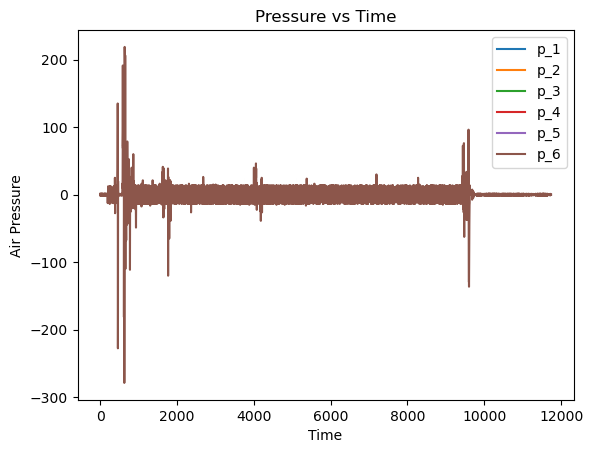

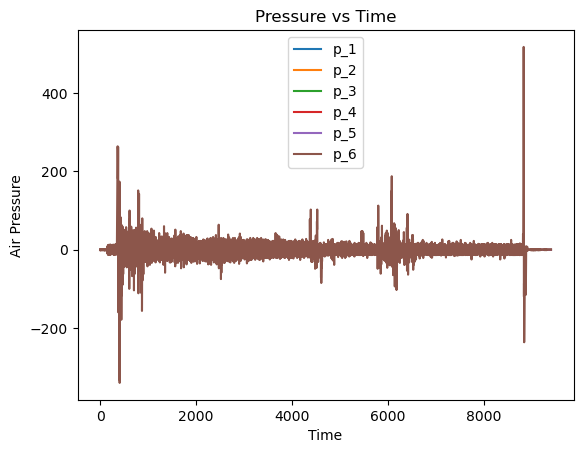

In [397]:
plot.plot_time_domain([barometer_before_1, barometer_before_2, barometer_before_3, barometer_before_4, barometer_before_5, barometer_before_6], start_idx=0, end_idx=len(barometer_before_1))
plot.plot_time_domain([barometer_after_1, barometer_after_2, barometer_after_3, barometer_after_4, barometer_after_5, barometer_after_6], start_idx=0, end_idx=len(barometer_after_1))

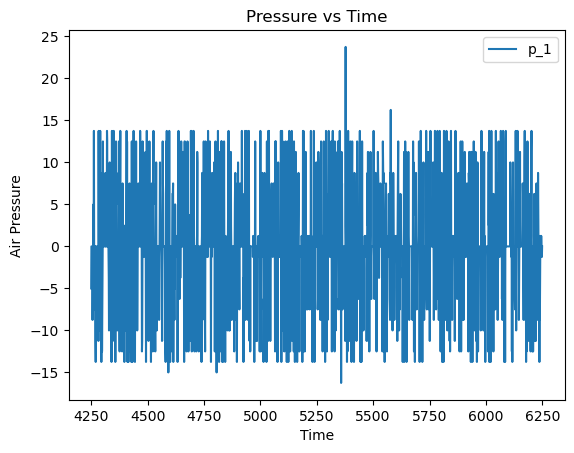

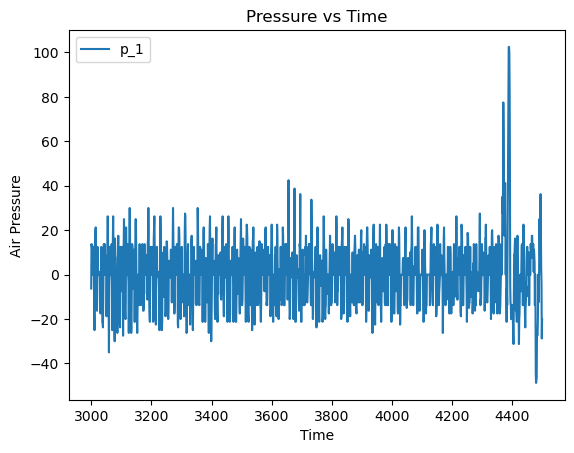

In [398]:
plot.plot_time_domain([barometer_before_6], start_idx=start_before, end_idx=end_before)
plot.plot_time_domain([barometer_after_6], start_idx=start_after, end_idx= end_after)

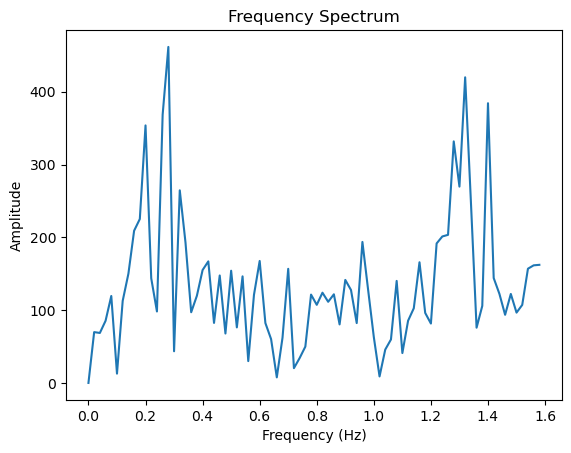

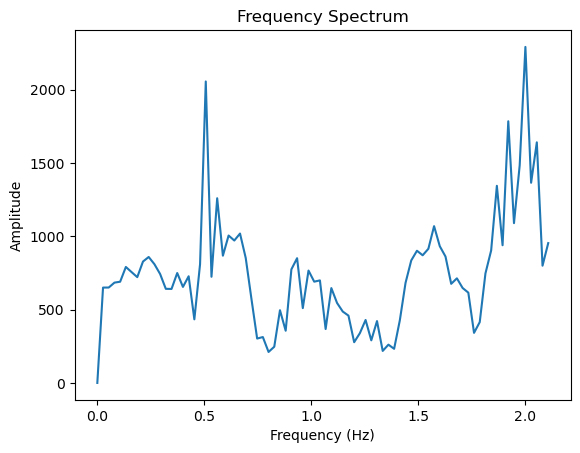

In [399]:
barometer_before_6[start_before:end_before] = barometer_before_6[start_before:end_before] - np.mean(barometer_before_6[start_before:end_before])
barometer_after_6[start_after:end_after] = barometer_after_6[start_after:end_after] - np.mean(barometer_after_6[start_after:end_after])

fft_result_before = fft(barometer_before_6[start_before:end_before])
fft_result_after = fft(barometer_after_6[start_after:end_after])

fft_magnitude_before = np.abs(fft_result_before)
fft_magnitude_after = np.abs(fft_result_after)

sampling_rate = 40

frequencies_before = np.fft.fftfreq(len(barometer_before_6[start_before:end_before]), d=1/sampling_rate)
frequencies_after = np.fft.fftfreq(len(barometer_after_6[start_after:end_after]), d=1/sampling_rate)

plot.plot_frequency_domaine(frequencies_before, fft_magnitude_before, start_freq=0, end_freq=80)
plot.plot_frequency_domaine(frequencies_after, fft_magnitude_after, start_freq=0, end_freq=80)



In [400]:
mask_breath_before = (frequencies_before >= 0.2) & (frequencies_before <= 0.33)
frequencies_breath_before = frequencies_before[mask_breath_before]
max_breath_freq_before = frequencies_breath_before[np.argmax(fft_magnitude_before[mask_breath_before])]

mask_heartbeat_before = (frequencies_before >= 1) & (frequencies_before <= 1.67)
frequencies_heartbeat_before = frequencies_before[mask_heartbeat_before]
max_heartbeat_freq_before = frequencies_heartbeat_before[np.argmax(fft_magnitude_before[mask_heartbeat_before])]

print(f"Breath frequency is {max_breath_freq_before} Hz")
print(f"Breath rate is {60*max_breath_freq_before}/min ")
print(f"Heartbeat frequency is {max_heartbeat_freq_before} Hz")
print(f"Heartbeat rate is {60*max_heartbeat_freq_before}/min ")


Breath frequency is 0.28 Hz
Breath rate is 16.8/min 
Heartbeat frequency is 1.32 Hz
Heartbeat rate is 79.2/min 


In [401]:
mask_breath_after = (frequencies_after  >= 0.2) & (frequencies_after <= 0.6)
frequencies_breath_after = frequencies_after[mask_breath_after]
max_breath_freq_after = frequencies_breath_after[np.argmax(fft_magnitude_after[mask_breath_after])]

mask_heartbeat_after = (frequencies_after >= 1) & (frequencies_after <= 2.2)
frequencies_heartbeat_after = frequencies_after[mask_heartbeat_after]
max_heartbeat_freq_after = frequencies_heartbeat_after[np.argmax(fft_magnitude_after[mask_heartbeat_after])]

print(f"Breath frequency is {max_breath_freq_after} Hz")
print(f"Breath rate is {60*max_breath_freq_after}/min ")
print(f"Heartbeat frequency is {max_heartbeat_freq_after} Hz")
print(f"Heartbeat rate is {60*max_heartbeat_freq_after}/min ")


Breath frequency is 0.5066666666666667 Hz
Breath rate is 30.400000000000002/min 
Heartbeat frequency is 2.0 Hz
Heartbeat rate is 120.0/min 
